<a href="https://colab.research.google.com/github/rzkyadhi/Recognizing-Handwritten-Digits-Using-Support-Vector-Machine/blob/main/Recognizing_Handwritten_Digits_Using_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

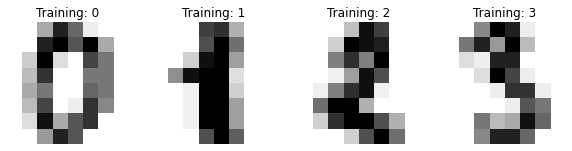

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.1)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)
predicted = clf.predict(x_test)

0.9833333333333333


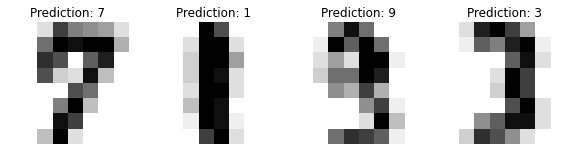

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
  ax.set_axis_off()
  image = image.reshape(8, 8)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Prediction: {prediction}")

In [10]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        23
           2       0.95      1.00      0.97        19
           3       1.00      0.95      0.98        22
           4       1.00      1.00      1.00        16
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        17
           8       0.92      1.00      0.96        12
           9       1.00      0.94      0.97        16

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180




Confusion matrix:
[[21  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0]
 [ 0  0  1 21  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0 16  1  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  1 15]]


<function matplotlib.pyplot.show>

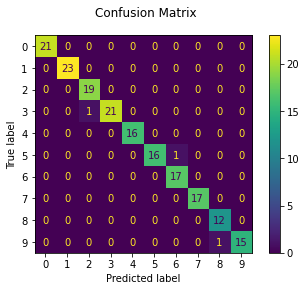

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show